# COURSE: PCA and multivariate neural signal processing
## SECTION: Source separation with GED
### VIDEO: Python: ZCA demo
#### Instructor: sincxpress.com

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import sqrtm

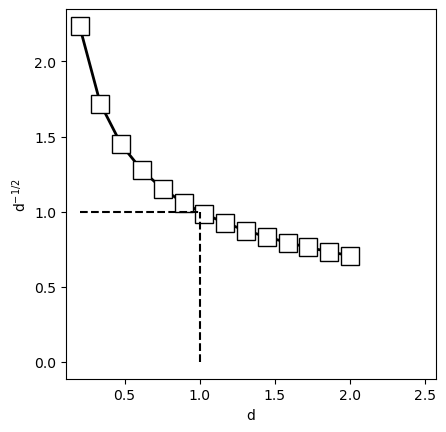

In [2]:
## illustration of negative-square root exponentiation

d = np.linspace(.2,2,14)

plt.plot(d,d**(-1/2),'ks-',linewidth=2,markerfacecolor='w',markersize=13)
plt.plot([d[0],1],[1,1],'k--')
plt.plot([1,1],[0,1],'k--')
plt.axis('square')
plt.xlabel('d')
plt.ylabel('d$^{-1/2}$')
plt.show()

In [5]:
## generate 2D data

# number of data points
N = 1000


# part 1 of the data
x1 = np.hstack( (1*np.random.randn(N//2,1), .1*np.random.randn(N//2,1)) )
# rotation matrix
th = np.pi/4
R1 = np.array([ [np.cos(th), -np.sin(th)], 
                [np.sin(th),  np.cos(th)] ])


# part 2 of the data
x2 = np.hstack( (1*np.random.randn(N//2,1), .1*np.random.randn(N//2,1)) )
# note the different rotation angle
th = np.pi
R2 = np.array([ [np.cos(th), -np.sin(th)], 
                [np.sin(th),  np.cos(th)] ])



# combine and rotate data
y = np.vstack( (x1@R1,x2@R2) )

(1000, 2)

In [4]:
## eigendecomposition for PCA and ZCA

# eig of y
y -= np.mean(y,axis=0)
covmat = y.T@y / (len(y)-1)
d,V = np.linalg.eig(covmat)

# create diagonal matrix from eigenvalues
D = np.diag(d)


# component data
c = y@V



# ZCA
DinvSqrt = sqrtm(np.linalg.inv(D))
yz = ( V@DinvSqrt@V.T@y.T ).T

# now PCA of ZCA data (question: Do you need the N-1 scaling?)
Dz,Vz = np.linalg.eig( yz.T@yz )
cz = yz@Vz

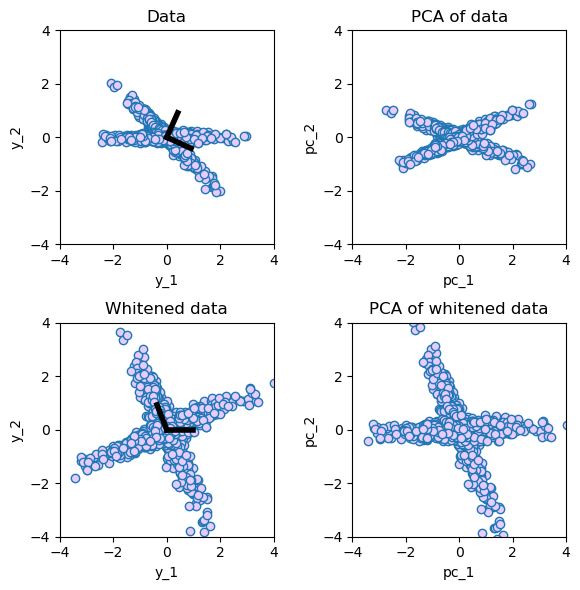

In [5]:
## plotting

_,axs = plt.subplots(2,2,figsize=(6,6))

# original data
axs[0,0].plot(y[:,0],y[:,1],'o',markerfacecolor=(.9,.8,1))
axs[0,0].plot([0,V[0,0]],[0,V[1,0]],'k',linewidth=4)
axs[0,0].plot([0,V[0,1]],[0,V[1,1]],'k',linewidth=4)
axs[0,0].set_xlabel('y_1')
axs[0,0].set_ylabel('y_2')
axs[0,0].set_xlim([-4,4])
axs[0,0].set_ylim([-4,4])
axs[0,0].set_aspect('equal')
axs[0,0].set_title('Data')

# component projections
axs[0,1].plot(c[:,0],c[:,1],'o',markerfacecolor=(.9,.8,1))
axs[0,1].set_xlabel('pc_1')
axs[0,1].set_ylabel('pc_2')
axs[0,1].set_xlim([-4,4])
axs[0,1].set_ylim([-4,4])
axs[0,1].set_aspect('equal')
axs[0,1].set_title('PCA of data')



# whitened data
axs[1,0].plot(yz[:,0],yz[:,1],'o',markerfacecolor=(.9,.8,1))
axs[1,0].plot([0,Vz[0,0]],[0,Vz[1,0]],'k',linewidth=4)
axs[1,0].plot([0,Vz[0,1]],[0,Vz[1,1]],'k',linewidth=4)
axs[1,0].set_xlabel('y_1')
axs[1,0].set_ylabel('y_2')
axs[1,0].set_xlim([-4,4])
axs[1,0].set_ylim([-4,4])
axs[1,0].set_aspect('equal')
axs[1,0].set_title('Whitened data')

# component projections
axs[1,1].plot(cz[:,0],cz[:,1],'o',markerfacecolor=(.9,.8,1))
axs[1,1].set_xlabel('pc_1')
axs[1,1].set_ylabel('pc_2')
axs[1,1].set_xlim([-4,4])
axs[1,1].set_ylim([-4,4])
axs[1,1].set_aspect('equal')
axs[1,1].set_title('PCA of whitened data')


plt.tight_layout()
plt.show()